# Applied Data Science Capstone Project - Prediction of Car Accident Severity in Seattle

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wget

In [2]:
url = 'https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv'
filename = wget.download(url)
df = pd.read_csv('Data-Collisions.csv', header=0, low_memory=False)
df.head()

100% [....................................................] 73917638 / 73917638

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
df.shape

(194673, 38)

In [4]:
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [5]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [6]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

The above data need to be balanced and fixed in order to work with it

## Data Cleaning and Balancing

In [7]:
# create another dataframe by modifying df
df1 = df[['SEVERITYCODE', 'X', 'Y', 'INCKEY', 'ADDRTYPE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT', 
         'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE', 'JUNCTIONTYPE',
         'SDOT_COLCODE', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
         'ST_COLCODE', 'HITPARKEDCAR']]

In [8]:
df1.head()

,SEVERITYCODE,X,Y,INCKEY,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,JUNCTIONTYPE,SDOT_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR
0,2,-122.323148,47.703140,1307,Intersection,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,At Intersection (intersection related),11,N,Overcast,Wet,Daylight,10,N
1,1,-122.347294,47.647172,52200,Block,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,Mid-Block (not related to intersection),16,0,Raining,Wet,Dark - Street Lights On,11,N
2,1,-122.334540,47.607871,26700,Block,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,Mid-Block (not related to intersection),14,0,Overcast,Dry,Daylight,32,N
3,1,-122.334803,47.604803,1144,Block,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,Mid-Block (not related to intersection),11,N,Clear,Dry,Daylight,23,N
4,2,-122.306426,47.545739,17700,Intersection,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,At Intersection (intersection related),11,0,Raining,Wet,Daylight,10,N


In [9]:
df1.dtypes

SEVERITYCODE       int64
X                float64
Y                float64
INCKEY             int64
ADDRTYPE          object
SEVERITYDESC      object
COLLISIONTYPE     object
PERSONCOUNT        int64
PEDCOUNT           int64
PEDCYLCOUNT        int64
VEHCOUNT           int64
INCDATE           object
JUNCTIONTYPE      object
SDOT_COLCODE       int64
UNDERINFL         object
WEATHER           object
ROADCOND          object
LIGHTCOND         object
ST_COLCODE        object
HITPARKEDCAR      object
dtype: object

In [10]:
df2 = df1.set_index("INCKEY")           # set "INCKEY" as the index values

In [11]:
df2.head()

,SEVERITYCODE,X,Y,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,JUNCTIONTYPE,SDOT_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR
INCKEY,,,,,,,,,,,,,,,,,,,
1307,2,-122.323148,47.703140,Intersection,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,At Intersection (intersection related),11,N,Overcast,Wet,Daylight,10,N
52200,1,-122.347294,47.647172,Block,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,Mid-Block (not related to intersection),16,0,Raining,Wet,Dark - Street Lights On,11,N
26700,1,-122.334540,47.607871,Block,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,Mid-Block (not related to intersection),14,0,Overcast,Dry,Daylight,32,N
1144,1,-122.334803,47.604803,Block,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,Mid-Block (not related to intersection),11,N,Clear,Dry,Daylight,23,N
17700,2,-122.306426,47.545739,Intersection,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,At Intersection (intersection related),11,0,Raining,Wet,Daylight,10,N


In [12]:
df2.isnull().sum()

SEVERITYCODE        0
X                5334
Y                5334
ADDRTYPE         1926
SEVERITYDESC        0
COLLISIONTYPE    4904
PERSONCOUNT         0
PEDCOUNT            0
PEDCYLCOUNT         0
VEHCOUNT            0
INCDATE             0
JUNCTIONTYPE     6329
SDOT_COLCODE        0
UNDERINFL        4884
WEATHER          5081
ROADCOND         5012
LIGHTCOND        5170
ST_COLCODE         18
HITPARKEDCAR        0
dtype: int64

In [13]:
# fix the "UNDERINFL" column
df2['UNDERINFL'].replace("N", "0", inplace=True)
df2['UNDERINFL'].replace("Y", "1", inplace=True)

In [14]:
df2.head()

,SEVERITYCODE,X,Y,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,JUNCTIONTYPE,SDOT_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR
INCKEY,,,,,,,,,,,,,,,,,,,
1307,2,-122.323148,47.703140,Intersection,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,At Intersection (intersection related),11,0,Overcast,Wet,Daylight,10,N
52200,1,-122.347294,47.647172,Block,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,Mid-Block (not related to intersection),16,0,Raining,Wet,Dark - Street Lights On,11,N
26700,1,-122.334540,47.607871,Block,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,Mid-Block (not related to intersection),14,0,Overcast,Dry,Daylight,32,N
1144,1,-122.334803,47.604803,Block,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,Mid-Block (not related to intersection),11,0,Clear,Dry,Daylight,23,N
17700,2,-122.306426,47.545739,Intersection,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,At Intersection (intersection related),11,0,Raining,Wet,Daylight,10,N


In [15]:
!pip install missingno

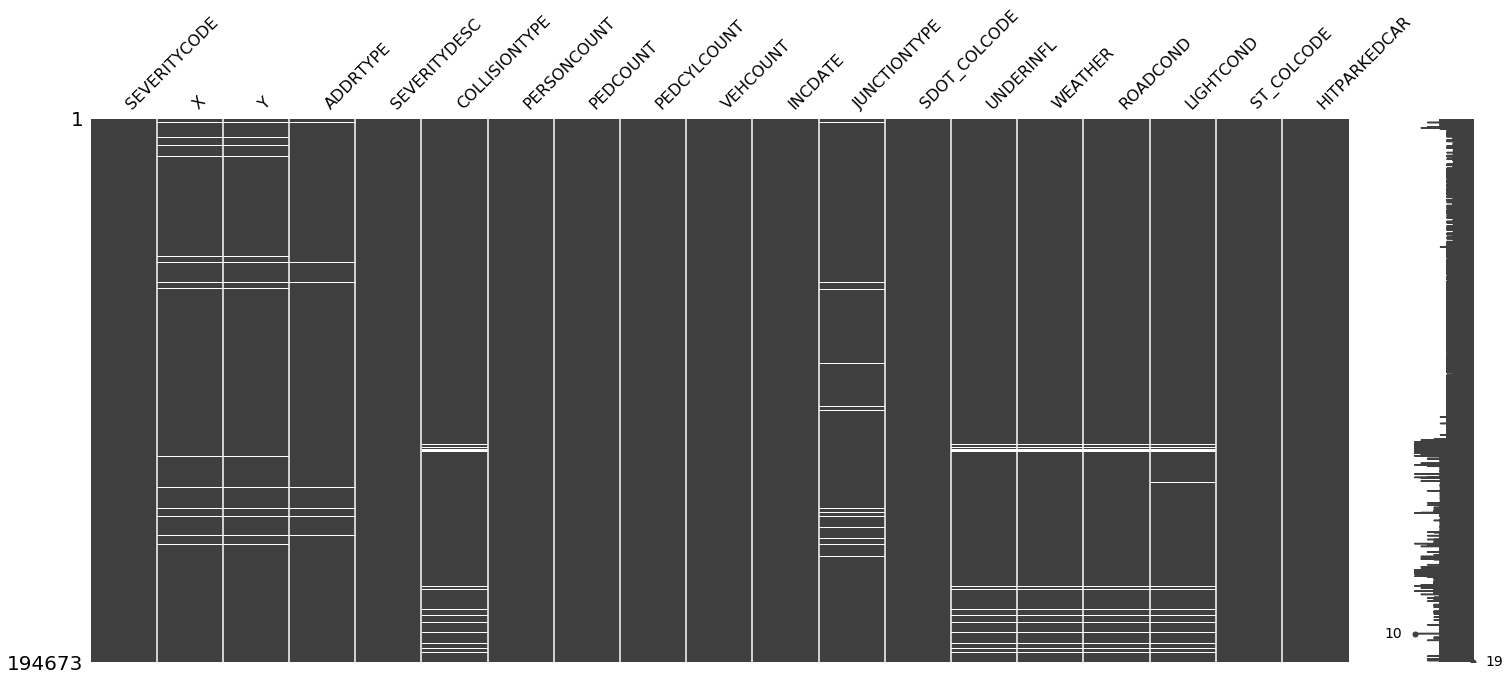

In [16]:
# use the missingno library for the exploratory visualization of missing data
import missingno as msno
msno.matrix(df2)

From the above result, we can see that:
- 'X', and 'Y' have missing values at the same location
- 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND' and 'COLLISIONTYPE have missing values at the same location

In [17]:
# let's modify df2 to create df3

df3 = df2.dropna(axis = 0)    # drop rows with null values

In [18]:
df3.head()

,SEVERITYCODE,X,Y,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,JUNCTIONTYPE,SDOT_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR
INCKEY,,,,,,,,,,,,,,,,,,,
1307,2,-122.323148,47.703140,Intersection,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,At Intersection (intersection related),11,0,Overcast,Wet,Daylight,10,N
52200,1,-122.347294,47.647172,Block,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,Mid-Block (not related to intersection),16,0,Raining,Wet,Dark - Street Lights On,11,N
26700,1,-122.334540,47.607871,Block,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,Mid-Block (not related to intersection),14,0,Overcast,Dry,Daylight,32,N
1144,1,-122.334803,47.604803,Block,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,Mid-Block (not related to intersection),11,0,Clear,Dry,Daylight,23,N
17700,2,-122.306426,47.545739,Intersection,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,At Intersection (intersection related),11,0,Raining,Wet,Daylight,10,N


In [19]:
df3.shape

(180067, 19)

In [20]:
df3.dtypes

SEVERITYCODE       int64
X                float64
Y                float64
ADDRTYPE          object
SEVERITYDESC      object
COLLISIONTYPE     object
PERSONCOUNT        int64
PEDCOUNT           int64
PEDCYLCOUNT        int64
VEHCOUNT           int64
INCDATE           object
JUNCTIONTYPE      object
SDOT_COLCODE       int64
UNDERINFL         object
WEATHER           object
ROADCOND          object
LIGHTCOND         object
ST_COLCODE        object
HITPARKEDCAR      object
dtype: object

In [21]:
df2.isnull().sum()

SEVERITYCODE        0
X                5334
Y                5334
ADDRTYPE         1926
SEVERITYDESC        0
COLLISIONTYPE    4904
PERSONCOUNT         0
PEDCOUNT            0
PEDCYLCOUNT         0
VEHCOUNT            0
INCDATE             0
JUNCTIONTYPE     6329
SDOT_COLCODE        0
UNDERINFL        4884
WEATHER          5081
ROADCOND         5012
LIGHTCOND        5170
ST_COLCODE         18
HITPARKEDCAR        0
dtype: int64

In [22]:
# change dtype of SDOT_COLCODE from int to object

df3[["SDOT_COLCODE"]] = df3[["SDOT_COLCODE"]].astype("object")

C:\Users\sony\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [23]:
# change INCDATE to the format 'datetime' i.e from 2013/03/27 to 23-03-27

df3['INCDATE'] = pd.to_datetime(df3['INCDATE'])

C:\Users\sony\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
df3.head()

,SEVERITYCODE,X,Y,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,JUNCTIONTYPE,SDOT_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR
INCKEY,,,,,,,,,,,,,,,,,,,
1307,2,-122.323148,47.703140,Intersection,Injury Collision,Angles,2,0,0,2,2013-03-27 00:00:00+00:00,At Intersection (intersection related),11,0,Overcast,Wet,Daylight,10,N
52200,1,-122.347294,47.647172,Block,Property Damage Only Collision,Sideswipe,2,0,0,2,2006-12-20 00:00:00+00:00,Mid-Block (not related to intersection),16,0,Raining,Wet,Dark - Street Lights On,11,N
26700,1,-122.334540,47.607871,Block,Property Damage Only Collision,Parked Car,4,0,0,3,2004-11-18 00:00:00+00:00,Mid-Block (not related to intersection),14,0,Overcast,Dry,Daylight,32,N
1144,1,-122.334803,47.604803,Block,Property Damage Only Collision,Other,3,0,0,3,2013-03-29 00:00:00+00:00,Mid-Block (not related to intersection),11,0,Clear,Dry,Daylight,23,N
17700,2,-122.306426,47.545739,Intersection,Injury Collision,Angles,2,0,0,2,2004-01-28 00:00:00+00:00,At Intersection (intersection related),11,0,Raining,Wet,Daylight,10,N


In [25]:
from datetime import date
df3['year'], df3['month'], df3['weekday'] = df3['INCDATE'].dt.year, df3['INCDATE'].dt.month, df3['INCDATE'].dt.weekday
df3.dtypes

C:\Users\sony\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


SEVERITYCODE                   int64
X                            float64
Y                            float64
ADDRTYPE                      object
SEVERITYDESC                  object
COLLISIONTYPE                 object
PERSONCOUNT                    int64
PEDCOUNT                       int64
PEDCYLCOUNT                    int64
VEHCOUNT                       int64
INCDATE          datetime64[ns, UTC]
JUNCTIONTYPE                  object
SDOT_COLCODE                  object
UNDERINFL                     object
WEATHER                       object
ROADCOND                      object
LIGHTCOND                     object
ST_COLCODE                    object
HITPARKEDCAR                  object
year                           int64
month                          int64
weekday                        int64
dtype: object

In [26]:
df3.head()      # separate columns or year, month and weekday are created replacing 'INCDATE'

,SEVERITYCODE,X,Y,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,...,SDOT_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR,year,month,weekday
INCKEY,,,,,,,,,,,,,,,,,,,,,
1307,2,-122.323148,47.703140,Intersection,Injury Collision,Angles,2,0,0,2,...,11,0,Overcast,Wet,Daylight,10,N,2013,3,2
52200,1,-122.347294,47.647172,Block,Property Damage Only Collision,Sideswipe,2,0,0,2,...,16,0,Raining,Wet,Dark - Street Lights On,11,N,2006,12,2
26700,1,-122.334540,47.607871,Block,Property Damage Only Collision,Parked Car,4,0,0,3,...,14,0,Overcast,Dry,Daylight,32,N,2004,11,3
1144,1,-122.334803,47.604803,Block,Property Damage Only Collision,Other,3,0,0,3,...,11,0,Clear,Dry,Daylight,23,N,2013,3,4
17700,2,-122.306426,47.545739,Intersection,Injury Collision,Angles,2,0,0,2,...,11,0,Raining,Wet,Daylight,10,N,2004,1,2


## Exploratory Data Analysis

### Catplots for Categorical data

In [27]:
import seaborn as sns

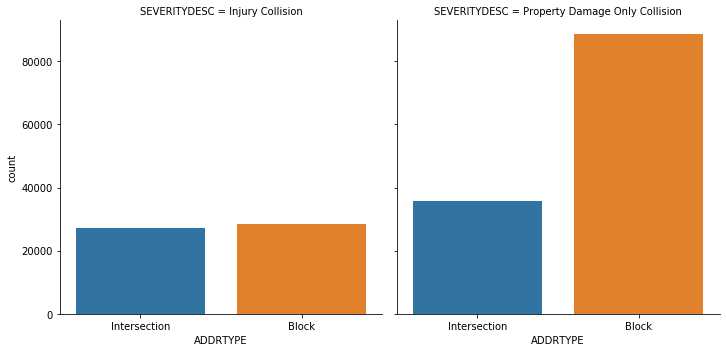

In [28]:
# create catplot of frequencies of ADDRTYPE

sns.catplot(x='ADDRTYPE', data=df3, kind='count', col='SEVERITYDESC')
plt.show()

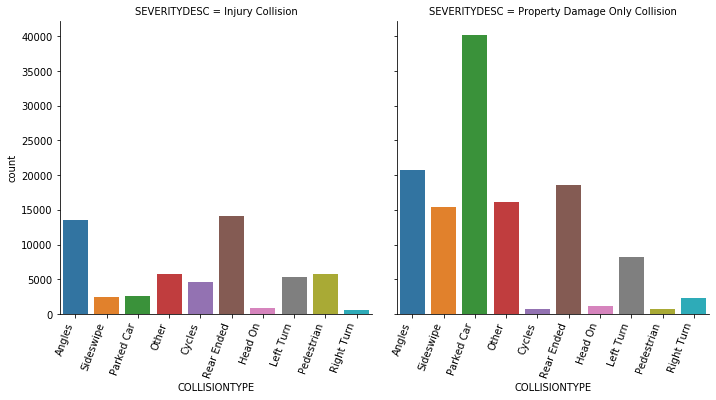

In [29]:
# create catplot of frequency of COLLISIONTYPE

chart = sns.catplot(x="COLLISIONTYPE", data=df3, kind='count', col='SEVERITYDESC')
chart.set_xticklabels(rotation=70, horizontalalignment='right')      # add labels of the COLLISIONTYPE

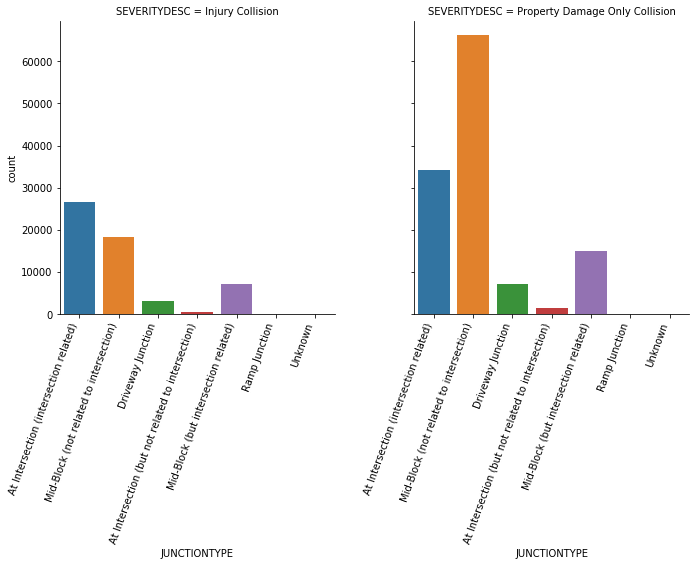

In [30]:
# plot catplot of frequency of JUNCTIONTYPE

chart1 = sns.catplot(x='JUNCTIONTYPE', data=df3, kind='count', col='SEVERITYDESC')
chart1.set_xticklabels(rotation=70, horizontalalignment='right')

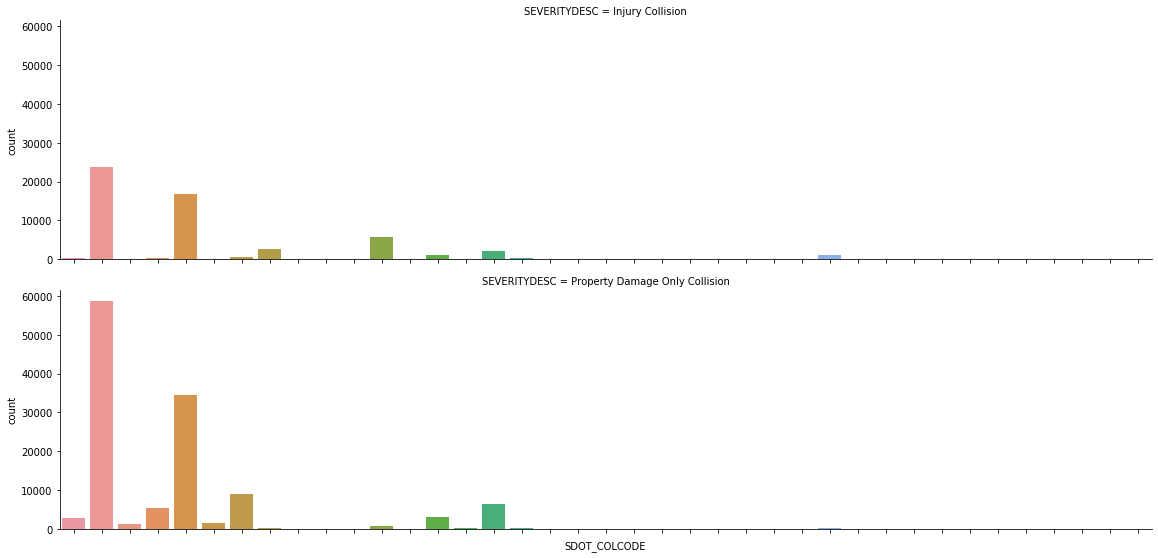

In [31]:
# plot catplot of frequency of SDOT_COLCODE

chart2 = sns.catplot(x='SDOT_COLCODE', data=df3, kind='count', row='SEVERITYDESC', aspect=4, height=4)
chart2.set_xticklabels(rotation=70)

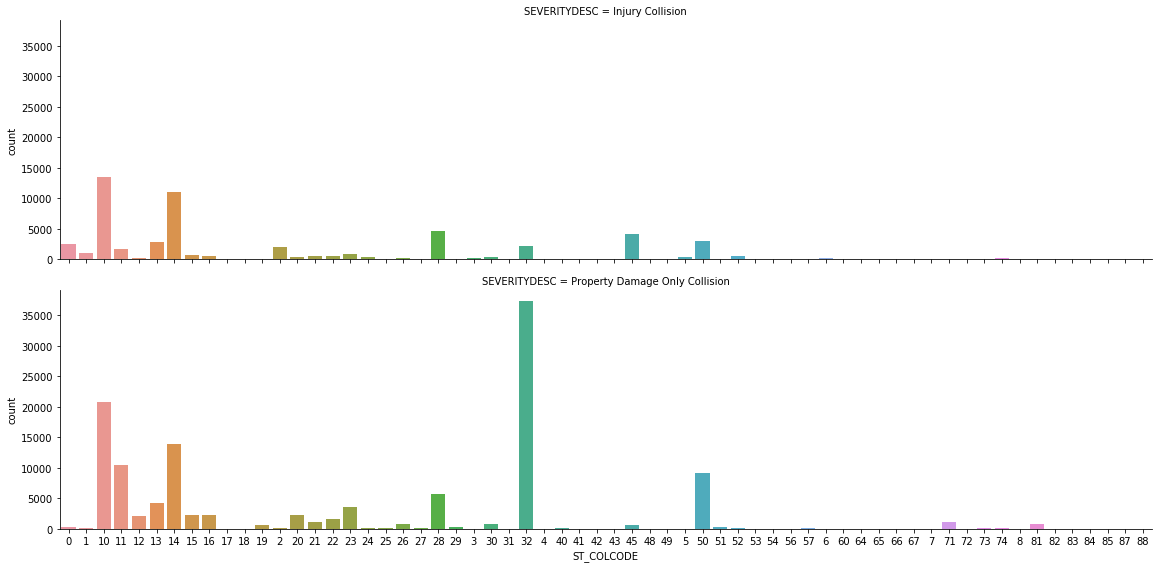

In [32]:
chart3 = sns.catplot(x = "ST_COLCODE", data = df3, kind = "count",  row= "SEVERITYDESC",aspect=4,height=4)

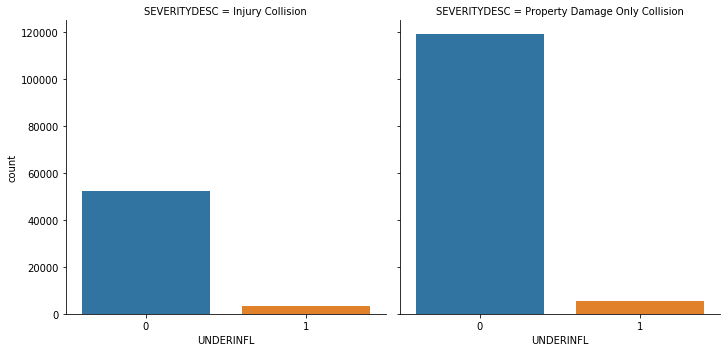

In [33]:
# plot catplot of frequency of UNDERINFL

chart4 = sns.catplot(x='UNDERINFL', data=df3, kind='count', col='SEVERITYDESC')

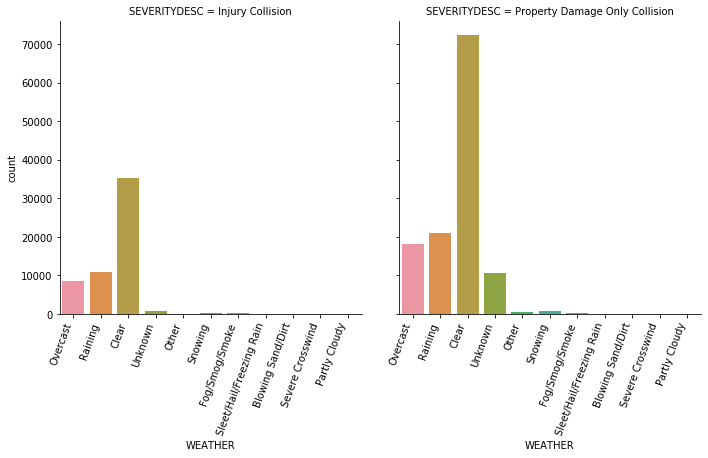

In [34]:
# plot catplot of frequency of WEATHER

chart5 = sns.catplot(x='WEATHER', data=df3, kind='count', col='SEVERITYDESC')
chart5.set_xticklabels(rotation=70, horizontalalignment='right')

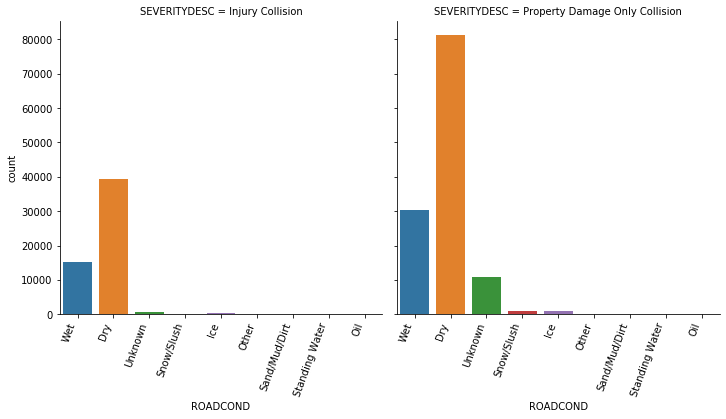

In [35]:
# plot catplot of frequency of ROADCOND

chart6 = sns.catplot(x='ROADCOND', data=df3, kind='count', col='SEVERITYDESC')
chart6.set_xticklabels(rotation=70, horizontalalignment='right')

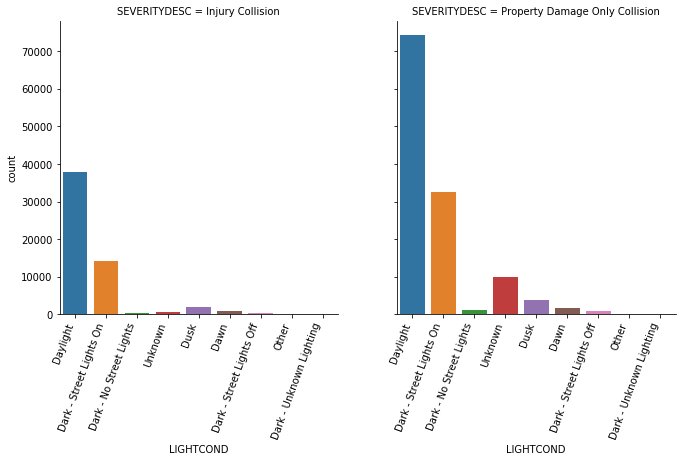

In [36]:
# plot catplot of frequency of LIGHTCOND

chart7 = sns.catplot(x='LIGHTCOND', data=df3, kind='count', col='SEVERITYDESC')
chart7.set_xticklabels(rotation=70, horizontalalignment='right')

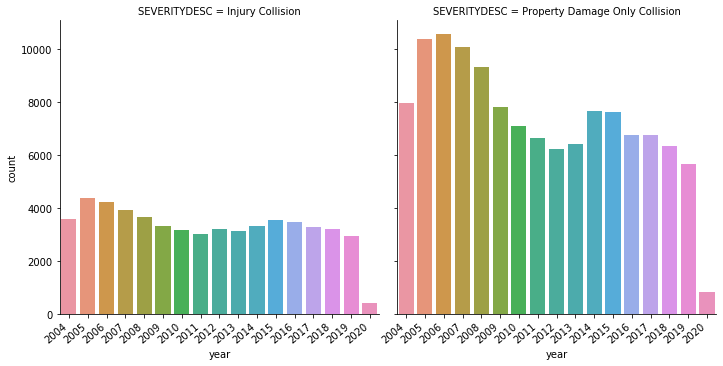

In [37]:
# plot catplot of frequency of year

chart8 = sns.catplot(x='year', data=df3, kind='count', col='SEVERITYDESC')
chart8.set_xticklabels(rotation=40, horizontalalignment='right')

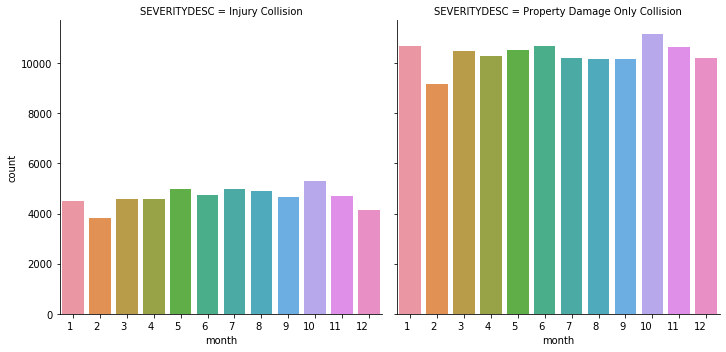

In [38]:
# plot catplot of frequency of month

chart9 = sns.catplot(x='month', data=df3, kind='count', col='SEVERITYDESC')
chart9.set_xticklabels(rotation=0, horizontalalignment='right')

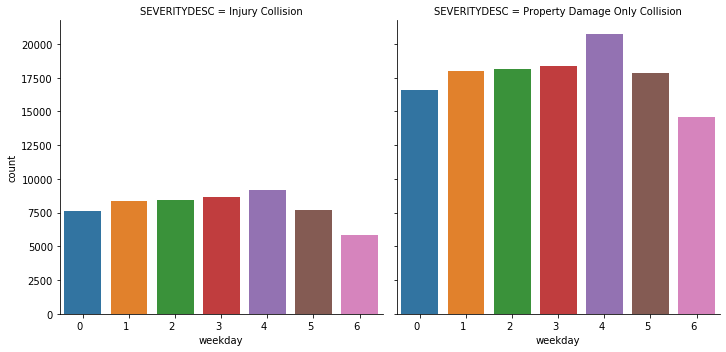

In [39]:
# plot catplot of frequency of weekday

chart10 = sns.catplot(x='weekday', data=df3, kind='count', col='SEVERITYDESC')
chart10.set_xticklabels(rotation=0, horizontalalignment='right')

### Distribution Plot for Numerical data

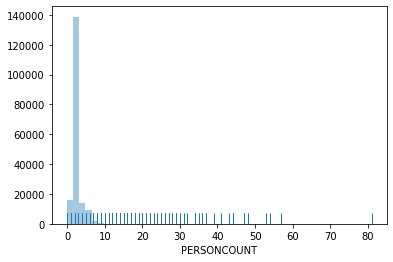

In [40]:
# plot a distribution plot of PERSONCOUNT

sns.distplot(df3['PERSONCOUNT'], kde=False, rug=True)     # kde=gaussian kernel density estimate
                                                          # rug=rugplot on the support axis 

## Using map to show the severity of Car Accidents

In [41]:
# install folium
!pip install folium

In [42]:
import folium 

In [43]:
df_2020 = df3[(df3['year'] == 2020)]          # take out data of the year 2020 only
df_2020.head()

,SEVERITYCODE,X,Y,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,...,SDOT_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR,year,month,weekday
INCKEY,,,,,,,,,,,,,,,,,,,,,
330897,2,-122.320780,47.614076,Intersection,Injury Collision,Cycles,3,0,1,1,...,51,0,Clear,Dry,Daylight,5,N,2020,4,2
330833,2,-122.328270,47.571420,Block,Injury Collision,Rear Ended,4,0,0,3,...,14,0,Clear,Dry,Daylight,14,N,2020,4,4
330873,1,-122.323349,47.711112,Block,Property Damage Only Collision,Rear Ended,2,0,0,2,...,14,0,Clear,Dry,Daylight,14,N,2020,4,2
330829,2,-122.322459,47.595831,Intersection,Injury Collision,Angles,2,0,0,2,...,11,0,Clear,Dry,Daylight,10,N,2020,4,0
330923,1,-122.368488,47.533713,Intersection,Property Damage Only Collision,Angles,2,0,0,2,...,11,0,Clear,Dry,Daylight,10,N,2020,4,0


In [44]:
df_2020.shape

(1236, 22)

### Seattle Map

In [45]:
# create seattle map

latitude = 47.6062
longitude = -122.3321

seattle_map = folium.Map(location=[latitude, longitude], zoom_start=12)
seattle_map

### Seattle Map for Severity of Car Accidents

In [46]:
from folium import plugins

In [47]:
# create seattle map of the year 2020 where there was severity of accidents

seattle_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(seattle_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_2020.Y, df_2020.X, df_2020.SEVERITYDESC):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
seattle_map

## Data Preparation

In [48]:
# create new dataframe by dropping some columns from df3
df3_a = df3.drop(['SEVERITYDESC', 'INCDATE', 'year', 'month', 'weekday'], axis=1)

In [49]:
df3_a.head()

,SEVERITYCODE,X,Y,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR
INCKEY,,,,,,,,,,,,,,,,,
1307,2,-122.323148,47.703140,Intersection,Angles,2,0,0,2,At Intersection (intersection related),11,0,Overcast,Wet,Daylight,10,N
52200,1,-122.347294,47.647172,Block,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),16,0,Raining,Wet,Dark - Street Lights On,11,N
26700,1,-122.334540,47.607871,Block,Parked Car,4,0,0,3,Mid-Block (not related to intersection),14,0,Overcast,Dry,Daylight,32,N
1144,1,-122.334803,47.604803,Block,Other,3,0,0,3,Mid-Block (not related to intersection),11,0,Clear,Dry,Daylight,23,N
17700,2,-122.306426,47.545739,Intersection,Angles,2,0,0,2,At Intersection (intersection related),11,0,Raining,Wet,Daylight,10,N


In [50]:
# create dummy variables of some of the columns and save it to a new dataframe

df4 = pd.get_dummies(data=df3_a, columns=['ADDRTYPE', 'COLLISIONTYPE', 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'HITPARKEDCAR'])
df4.head()

,SEVERITYCODE,X,Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,UNDERINFL,ST_COLCODE,...,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown,HITPARKEDCAR_N,HITPARKEDCAR_Y
INCKEY,,,,,,,,,,,,,,,,,,,,,
1307,2,-122.323148,47.703140,2,0,0,2,11,0,10,...,0,0,0,0,1,0,0,0,1,0
52200,1,-122.347294,47.647172,2,0,0,2,16,0,11,...,0,1,0,0,0,0,0,0,1,0
26700,1,-122.334540,47.607871,4,0,0,3,14,0,32,...,0,0,0,0,1,0,0,0,1,0
1144,1,-122.334803,47.604803,3,0,0,3,11,0,23,...,0,0,0,0,1,0,0,0,1,0
17700,2,-122.306426,47.545739,2,0,0,2,11,0,10,...,0,0,0,0,1,0,0,0,1,0


In [51]:
df4.shape

(180067, 60)

## Balanace Labels

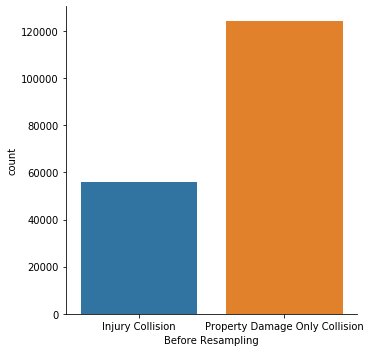

In [52]:
ax = sns.catplot(x='SEVERITYDESC', data=df3, kind='count')
ax.set(xlabel='Before Resampling')

### Resample the data

In [53]:
from sklearn.utils import resample

In [54]:
# separate majority and minority classes
df_majority = df4[df4.SEVERITYCODE==1]
df_minority = df4[df4.SEVERITYCODE==2]

# unsample minority class
df_minority_unsampled = resample(df_minority,
                                replace=True,
                                n_samples = 126270,
                                random_state=123)

# combine df_majority with df_minority_unsampled
df5 = pd.concat([df_majority, df_minority_unsampled])

df5.SEVERITYCODE.value_counts()

2    126270
1    124258
Name: SEVERITYCODE, dtype: int64

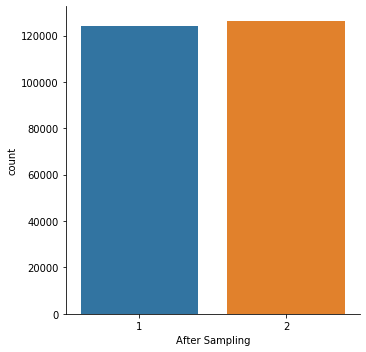

In [55]:
ax2 = sns.catplot(x='SEVERITYCODE', data=df5, kind='count')
ax2.set(xlabel='After Sampling')

In [56]:
df5.shape

(250528, 60)

In [57]:
y = df5.SEVERITYCODE
X = df5.drop('SEVERITYCODE', axis=1)               # set X and y labels

## Split data into Training and Testing sets

In [58]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [59]:
print('Train set: ', X_trainset.shape, y_trainset.shape)
print('Test set: ', X_testset.shape, y_testset.shape)

Train set:  (175369, 59) (175369,)
Test set:  (75159, 59) (75159,)


## K-Nearest Neighbors

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
# Training

k = 25
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_trainset, y_trainset)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [62]:
# Predicting

Kyhat = neigh.predict(X_testset)
Kyhat[0:5]

array([1, 2, 2, 2, 1], dtype=int64)

### Evaluation of K-Nearest Neighbors

In [63]:
from sklearn import metrics
print('K-Nearest Neighbors Accuracy = ', metrics.accuracy_score(y_testset, Kyhat))

K-Nearest Neighbors Accuracy =  0.7157625833233545


In [64]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

print('K-Nearest Neighbors Jaccard Similarity Score = ', jaccard_similarity_score(y_testset, Kyhat))
print('K-Nearest Neighbors F1 Score = ', f1_score(y_testset, Kyhat, average='weighted'))

K-Nearest Neighbors Jaccard Similarity Score =  0.7157625833233545
K-Nearest Neighbors F1 Score =  0.7152435142522877


C:\Users\sony\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


In [77]:
!pip install scikit-plot

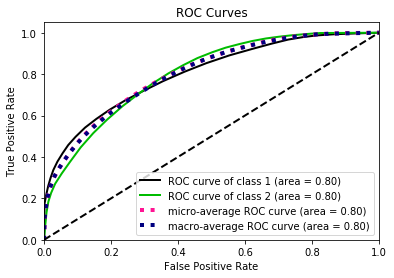

In [78]:
import scikitplot as skplt
import matplotlib.pyplot as plt

# Plot ROC (Receiver operating characteristic) curve
y_true = y_testset
KNN_y_probas = neigh.predict_proba(X_testset)
skplt.metrics.plot_roc(y_true, KNN_y_probas)
plt.show()

# Decision Tree

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
DT = DecisionTreeClassifier(criterion='entropy', max_depth=4)
DT

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [67]:
# Training

DT.fit(X_trainset, y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [68]:
# Prediction

DTyhat = DT.predict(X_testset)
DTyhat[0:5]

array([1, 2, 2, 2, 1], dtype=int64)

### Evaluation of Decision Tree

In [69]:
# Accuracy score

print("Decision Tree's Accuracy = ", metrics.accuracy_score(y_testset, DTyhat))

Decision Tree's Accuracy =  0.6833512952540614


In [70]:
print('Decision Tree Jaccard Similarity Score = ', jaccard_similarity_score(y_testset, DTyhat))
print('Decision Tree F1 Score = ', f1_score(y_testset, DTyhat, average='weighted'))

Decision Tree Jaccard Similarity Score =  0.6833512952540614
Decision Tree F1 Score =  0.6643819514335526


C:\Users\sony\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


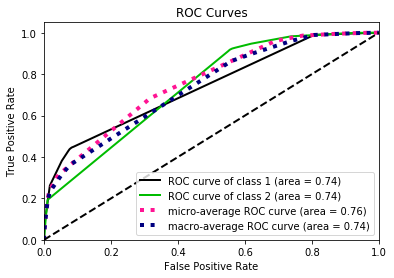

In [79]:
# Plot ROC curve
y_true = y_testset
DT_y_probas = DT.predict_proba(X_testset)
skplt.metrics.plot_roc(y_true, DT_y_probas)
plt.show()

## Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression

# Training
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_trainset, y_trainset)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
# Predicting
LRyhat = LR.predict(X_testset)
LRyhat[0:5]

array([1, 2, 2, 2, 1], dtype=int64)

**predict_proba**  returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X):


In [74]:
LRyhat_prob = LR.predict_proba(X_testset)
LRyhat_prob[0:5]

array([[0.62619001, 0.37380999],
       [0.39578341, 0.60421659],
       [0.11475381, 0.88524619],
       [0.35697138, 0.64302862],
       [0.95169541, 0.04830459]])

### Evaluation of Logistic Regression

In [75]:
print("Decision Tree's Accuracy = ", metrics.accuracy_score(y_testset, LRyhat))

Decision Tree's Accuracy =  0.7038012746311154


In [76]:
from sklearn.metrics import log_loss

print('Logistic Regression Jaccard Similarity Score = ', jaccard_similarity_score(y_testset, LRyhat))
print('Logistic Regression F1 Score = ', f1_score(y_testset, LRyhat, average='weighted'))
print('Logistic Regression Log Loss= ', log_loss(y_testset, LRyhat_prob))

Logistic Regression Jaccard Similarity Score =  0.7038012746311154
Logistic Regression F1 Score =  0.7004087874270927
Logistic Regression Log Loss=  0.5445181216025357


C:\Users\sony\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


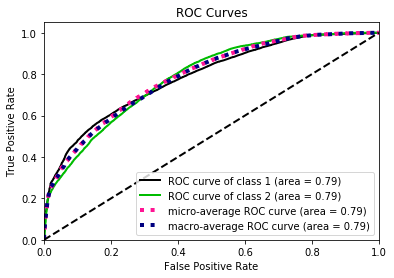

In [80]:
# Plot ROC Curve
y_true = y_testset
skplt.metrics.plot_roc(y_true, LRyhat_prob)
plt.show()